In [1]:
# https://documentation.sas.com/?docsetId=casdlpg&docsetTarget=n0rkb1a1p6r6kpn141f6yxzfaawj.htm&docsetVersion=8.3&locale=en#n090ivvi7wzhgxn1v554m3wpkbpi

#display matplot graphics in notebook cell
%matplotlib inline

#suppress warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import SAS Wrapper for Analytics Transfer (SWAT) 
import swat

s = swat.CAS('centis', 5570, 'sasdemo', 'SASpw1')
print(s)

CAS('centis', 5570, 'sasdemo', protocol='cas', name='py-session-1', session='5d1c6e9d-48bb-ff4a-aa70-aa23c9096d47')


In [2]:
# Import DLPy model functions
from dlpy import Model, Sequential

# Import DLPy layer functions
from dlpy.layers import *

# Import DLPy application functions
from dlpy.applications import *

In [3]:
# Use DLPy to create a sequential model and name it 'Simple_CNN' 
model1 = Sequential(s, model_table = 'Simple_CNN')
print(model1)

In [4]:
# Now define an input layer to add to model1
# The input shape contains RGB images (3 channels)
# The model images are 224 px in height and 224 px in width
model1.add(InputLayer(3,224,224))

NOTE: Input layer added.


In [5]:
# Add 2-Dimensional Convolution Layer to model1
# that has 8 filters and a kernel size of 7. 
model1.add(Conv2d(8,7))

NOTE: Convolution layer added.


In [6]:
# Add Pooling Layer of size 2
model1.add(Pooling(2))

NOTE: Pooling layer added.


In [7]:
# Add another 2D convolution Layer that has 8 filters
# and a kernel size of 7 
model1.add(Conv2d(8,7))

NOTE: Convolution layer added.


In [8]:
# Add a pooling layer of size 2 to # complete the second pair of layers. 
model1.add(Pooling(2))

NOTE: Pooling layer added.


In [9]:
# Add Fully-Connected Layer with 16 units
model1.add(Dense(16))

NOTE: Fully-connected layer added.


In [10]:
# Add an output layer that has 2 nodes and uses
# the Softmax activation function 
model1.add(OutputLayer(act='softmax',n=2))

NOTE: Output layer added.
NOTE: Model compiled successfully.


In [11]:
# Display a brief summary table of model1
model1.print_summary()

,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,Input1,input,None,None,None,"(224, 224, 3)","(0, 0)"
1,Convo.1,convo,"(7, 7)",1,Relu,"(224, 224, 8)","(1176, 8)"
2,Pool1,pool,"(2, 2)",2,Max,"(112, 112, 8)","(0, 0)"
3,Convo.2,convo,"(7, 7)",1,Relu,"(112, 112, 8)","(3136, 8)"
4,Pool2,pool,"(2, 2)",2,Max,"(56, 56, 8)","(0, 0)"
5,F.C.1,fc,"(25088, 16)",None,Relu,16,"(401408, 0)"
6,Output1,output,"(16, 2)",None,Softmax,2,"(32, 2)"
7,,,,,,,405770


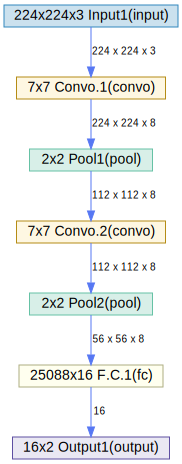

In [12]:
# Use Graphviz to display network DAG for Simple_CNN model

model1.plot_network()

In [ ]:
from dlpy.images import ImageTable
img_path='/disk/linux/dlpy/Giraffe_Dolphin'
my_images = ImageTable.load_files(sess, path=img_path)
my_images.head()
my_images.show(nimages=4, ncol=4, randomize=True)
my_images.label_freq
my_images.image_summary

In [29]:
s.terminate()